In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ITEMMASTER.csv')

In [4]:
items.isnull().sum()

Master Planning Family    0
Product Department        0
Product Group             0
Product Line              0
Product Price Group       0
Product Sub Group         0
Product Type              0
Short Name                0
dtype: int64

In [5]:
items.dtypes

Master Planning Family    object
Product Department        object
Product Group              int64
Product Line               int64
Product Price Group       object
Product Sub Group          int64
Product Type               int64
Short Name                 int64
dtype: object

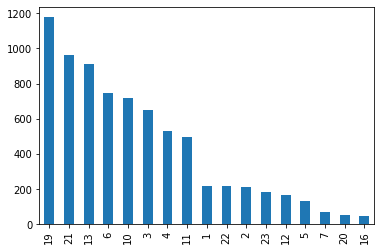

In [6]:
items['Product Group'].value_counts().plot.bar()

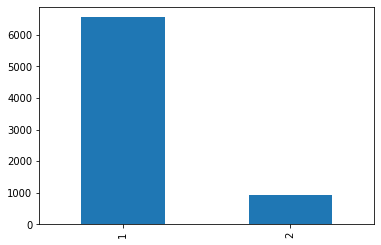

In [ ]:
items['Product Line'].value_counts().plot.bar()

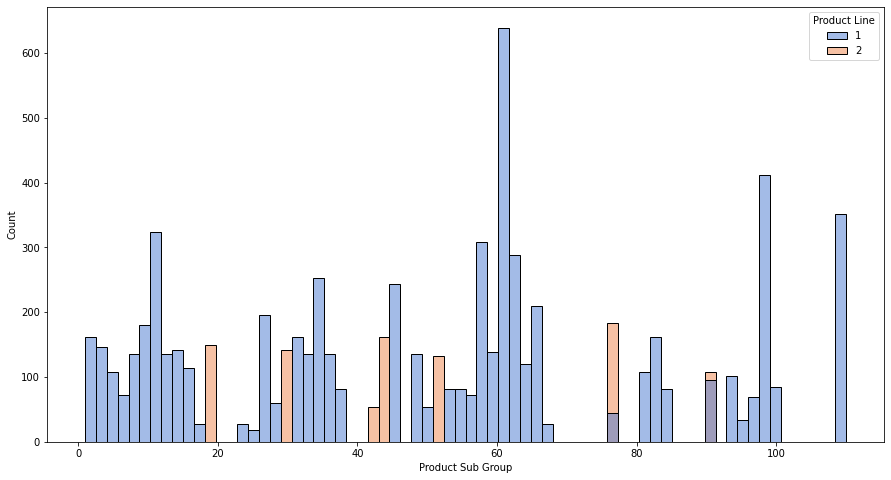

In [ ]:
plt.figure(figsize=(15,8))
sb.histplot(x='Product Sub Group', data=items, hue='Product Line', bins=70, palette='muted')

In [ ]:
items.head(-5)

,Master Planning Family,Product Department,Product Group,Product Line,Product Price Group,Product Sub Group,Product Type,Short Name
0,,,7,1,N,3,26,10977
1,,,7,1,N,3,26,10977
2,,,7,1,N,3,26,10977
3,G09,1,7,1,,3,26,10977
4,G09,1,7,1,,3,26,10977
...,...,...,...,...,...,...,...,...
7469,G07,1,19,1,,99,26,10198
7470,50,1,11,1,N,91,33,10377
7471,50,1,11,1,N,91,33,10377
7472,50,1,11,1,N,91,33,10377


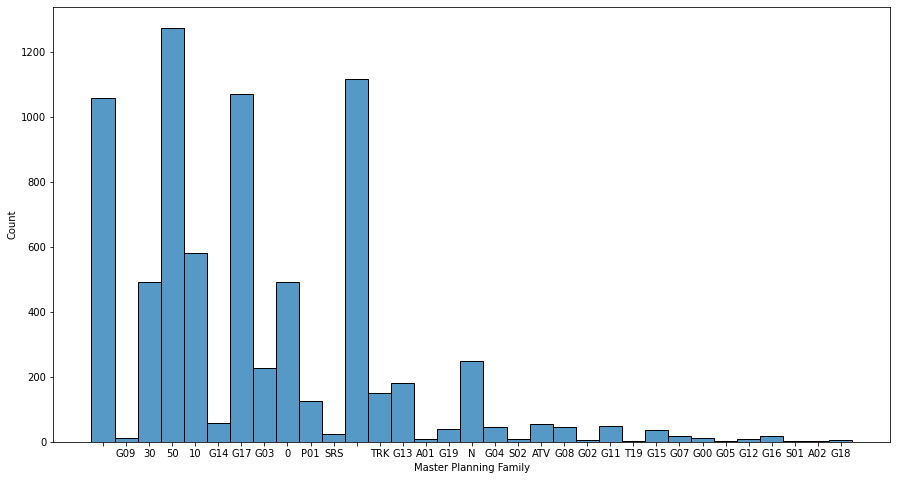

In [ ]:
plt.figure(figsize=(15,8))
sb.histplot(x='Master Planning Family', data=items)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/SALESMERGER.xlsx')

In [ ]:
sales.head()

,Actual Delivery Date,Address Number,CustKey,Backlog Amount,BackOrder Amount,DateKey,Discount Amount,Doc Type,Family Class,Invoice Date,Invoice Number,Item-Branch Key,Item Class,Item Number,Line Desc 1,Line Number,Line Type,List Price,Order Number,Parent Address Number,Payment Terms,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Sales Unit Cost Price,U/M,Unit Price,Sales Rep Name
0,NaT,10009631,10009631,NaN,NaN,2008-06-23,NaN,,T01,NaN,NaN,CR-10813,P01,38815.0,Ebony Fresh Lima Beans,1000,SA,144.13,203276,10009631,230,6/23/2008,NaN,NaN,NaN,NaN,NaN,NaN,185,NaN,EA,86.478,William Fisher
1,NaT,10009633,10009633,NaN,NaN,2008-09-19,NaN,,A03,NaN,NaN,CR-10951,P01,39557.0,Special Corn Puffs,1000,SA,13.19,210771,10009633,FRE,9/19/2008,NaN,NaN,NaN,NaN,NaN,NaN,127,NaN,EA,0.000,Edward Laychak
2,NaT,10009633,10009633,NaN,NaN,2008-09-12,NaN,,A03,NaN,NaN,CR-10951,P01,39557.0,Special Corn Puffs,1000,SA,13.19,210656,10009633,FRE,2008-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,127,NaN,EA,0.000,Edward Laychak
3,2008-06-27,10018871,10018871,NaN,NaN,2008-06-27,NaN,RI,,6/27/2008,106284.0,PC-10603,,NaN,Landslide Corn Oil,2000,F,0.00,203883,10021160,N30,6/27/2008,NaN,NaN,NaN,NaN,NaN,NaN,154,NaN,EA,11.270,Max Blagburn
4,NaT,10018871,10018871,NaN,NaN,2009-01-02,NaN,,,NaN,NaN,PC-10414,,62037.0,Big Time Ice Cream,1000,SA,18.42,214029,10021160,N30,2009-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,154,NaN,EA,18.420,Max Blagburn


In [ ]:
sales.isnull().sum()

Actual Delivery Date                 10108
Address Number                           0
CustKey                                  0
Backlog Amount                      296128
BackOrder Amount                    292705
DateKey                                  0
Discount Amount                      17264
Doc Type                                 0
Family Class                             0
Invoice Date                          9540
Invoice Number                        9540
Item-Branch Key                          0
Item Class                               0
Item Number                          11537
Line Desc 1                              0
Line Number                              0
Line Type                                0
List Price                               0
Order Number                             0
Parent Address Number                    0
Payment Terms                            0
Promised Delivery Date                   0
Sales Amount                          9995
Sales Amoun

In [ ]:
sales.dropna(subset=['Sales Amount'], inplace=True)

In [ ]:
sales.drop(['Address Number', 'DateKey', 'Family Class', 'Item Class', 'Item Number', 'Parent Address Number', 'Unit Price'], axis=1, inplace=True)

In [ ]:
sales.dtypes

Actual Delivery Date                datetime64[ns]
CustKey                                      int64
Backlog Amount                             float64
BackOrder Amount                           float64
Discount Amount                            float64
Doc Type                                    object
Invoice Date                                object
Invoice Number                             float64
Item-Branch Key                             object
Line Desc 1                                 object
Line Number                                  int64
Line Type                                   object
List Price                                 float64
Order Number                                 int64
Payment Terms                               object
Promised Delivery Date                      object
Sales Amount                               float64
Sales Amount Based on List Price           float64
Sales Cost Amount                          float64
Sales Margin Amount            

In [ ]:
sales.describe()

,CustKey,Backlog Amount,BackOrder Amount,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Sales Unit Cost Price
count,2.861460e+05,0.0,0.0,278877.000000,286146.000000,286146.000000,286146.000000,286146.000000,286146.000000,286146.000000,286146.000000,286146.000000,286102.000000,286146.000000,286146.000000,286146.000000
mean,1.001720e+07,NaN,NaN,616.857984,210973.087001,18947.814713,230.975917,213263.886792,907.205618,1500.409834,527.310525,379.895093,122.718546,18.043202,137.189725,70.786071
std,7.400986e+03,NaN,NaN,5072.163935,83536.451946,27346.147534,334.100060,79757.442482,8504.352579,11572.291658,5289.894043,3358.117140,194.238440,280.481005,25.866842,109.172119
min,1.000000e+07,NaN,NaN,-263495.420000,100001.000000,1000.000000,0.000000,100012.000000,-107127.000000,-225056.700000,-9392.930000,-107127.000000,-13749.600000,-1000.000000,103.000000,0.000000
25%,1.001173e+07,NaN,NaN,21.560000,121018.000000,2000.000000,29.990000,121225.000000,19.730000,46.000000,10.360000,9.070000,12.200000,1.000000,115.000000,6.865300
50%,1.001915e+07,NaN,NaN,82.820000,214055.000000,8000.000000,124.770000,211906.000000,91.190000,181.560000,48.800000,40.900000,64.686000,1.000000,131.000000,33.157200
75%,1.002351e+07,NaN,NaN,242.800000,307400.000000,25000.000000,245.810000,305614.000000,279.350000,518.800000,159.060000,122.380000,128.480000,3.000000,160.000000,74.665200
max,1.002763e+07,NaN,NaN,343532.660000,332848.000000,353000.000000,2760.700000,326619.000000,555376.000000,632610.160000,366576.000000,202083.200000,16176.000000,27500.000000,185.000000,6684.178900


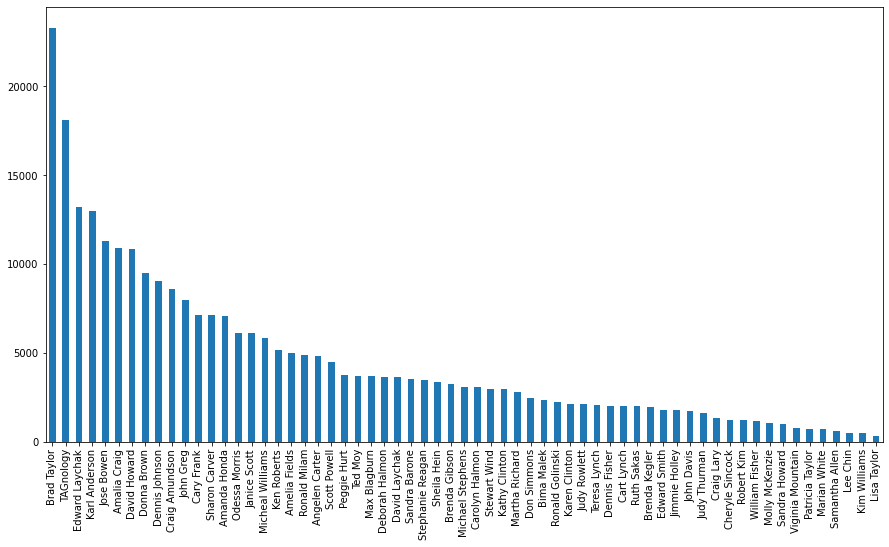

In [ ]:
plt.figure(figsize=(15,8))
sales['Sales Rep Name'].value_counts().plot.bar()

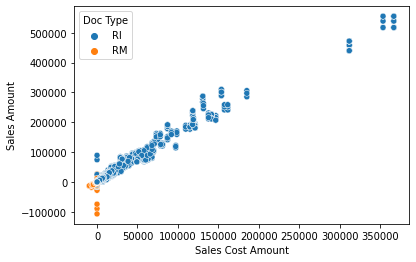

In [ ]:
sb.scatterplot(data=sales, x='Sales Cost Amount', y='Sales Amount', hue='Doc Type')

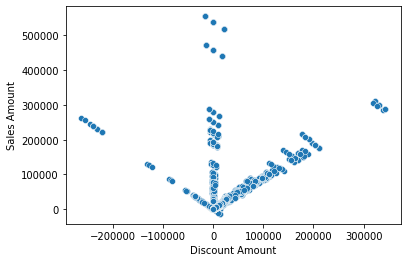

In [ ]:
sb.scatterplot(data=sales, x='Discount Amount', y='Sales Amount')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


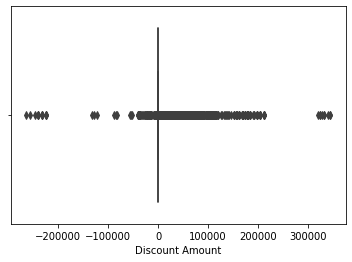

In [ ]:
sb.boxplot(sales['Discount Amount'])

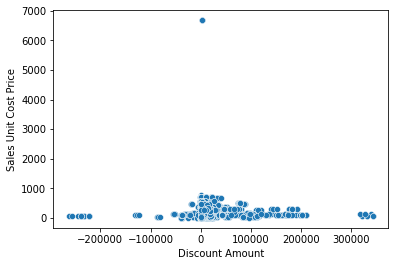

In [ ]:
sb.scatterplot(data=sales, x='Discount Amount', y='Sales Unit Cost Price')

In [ ]:
corr=sales.drop(['Actual Delivery Date', 'Invoice Date', 'Item-Branch Key', 'Line Desc 1', 'Payment Terms', 'Promised Delivery Date', 'Sales Rep Name'], axis=1)

In [ ]:
corr=pd.get_dummies(corr)

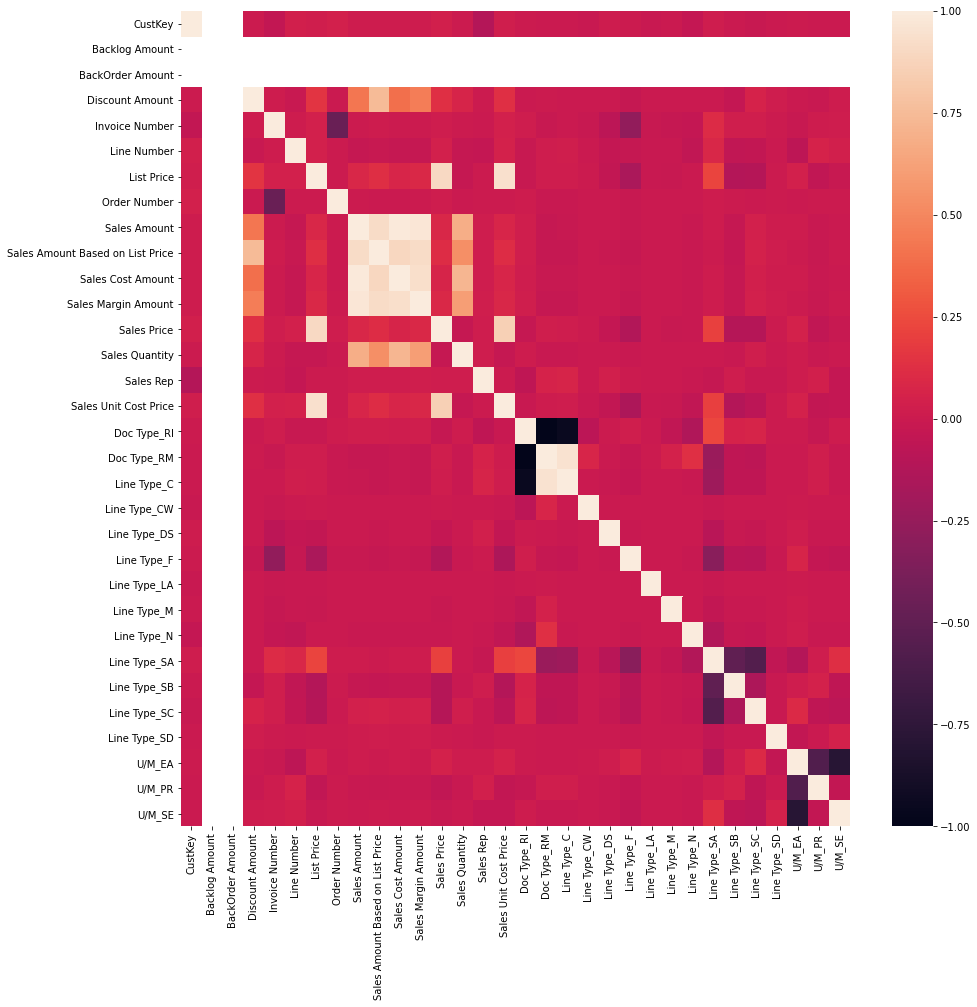

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
sb.heatmap(corr.corr())

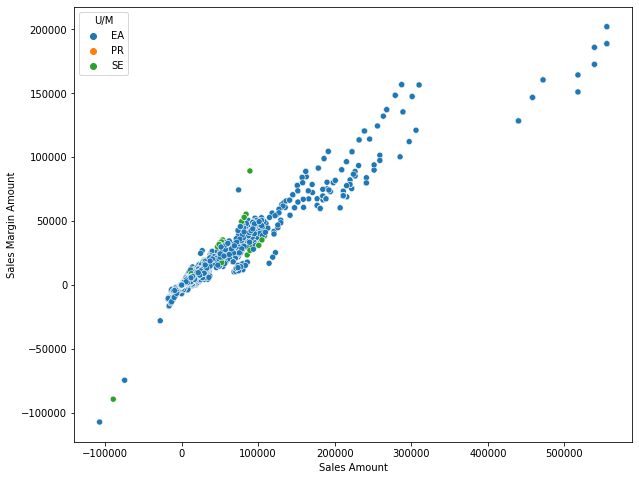

In [ ]:
ax=plt.figure(figsize=(10,8))
sb.scatterplot(data=sales, x='Sales Amount', y='Sales Margin Amount', hue='U/M')

In [ ]:
merger=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/MERGERALL.xlsx')

In [ ]:
merger.rename(index={'Customer Number':'CustKey'},inplace=True)

In [ ]:
merger.head()

,BudgetPeriod,Budget Amount,BudgetYear,Customer Number,textBudgetPeriod,Address Number,Business Family,Business Unit,Customer,Customer Type,Division,Division Name,Line of Business,Phone,Region Code,Region Name,Regional Sales Mgr,Search Type
0,4,32.7200,2008,10000000,Apr,10000000,R3,1,City Supermarket,G2,2,Domestic,,816-455-8733,4,Central,S16,C
1,6,36.4900,2008,10000000,Jun,10000000,R3,1,City Supermarket,G2,2,Domestic,,816-455-8733,4,Central,S16,C
2,4,30.1024,2009,10000000,Apr,10000000,R3,1,City Supermarket,G2,2,Domestic,,816-455-8733,4,Central,S16,C
3,6,33.5708,2009,10000000,Jun,10000000,R3,1,City Supermarket,G2,2,Domestic,,816-455-8733,4,Central,S16,C
4,1,-1126.7400,2008,10000455,Jan,10000455,R3,1,Caribian Supermarket,G2,2,Domestic,,816-455-8733,1,Western,S16,C


In [ ]:
combined=pd.merge(sales,merger, left_on="CustKey", right_on="Customer Number")

In [ ]:
combined.dtypes

Actual Delivery Date                datetime64[ns]
CustKey                                      int64
Backlog Amount                             float64
BackOrder Amount                           float64
Discount Amount                            float64
Doc Type                                    object
Invoice Date                                object
Invoice Number                             float64
Item-Branch Key                             object
Line Desc 1                                 object
Line Number                                  int64
Line Type                                   object
List Price                                 float64
Order Number                                 int64
Payment Terms                               object
Promised Delivery Date                      object
Sales Amount                               float64
Sales Amount Based on List Price           float64
Sales Cost Amount                          float64
Sales Margin Amount            

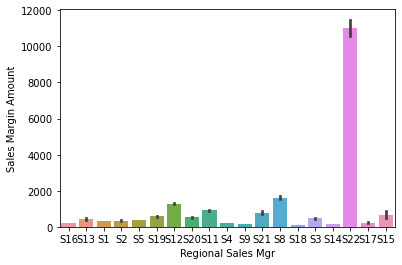

In [ ]:
sb.barplot(x='Regional Sales Mgr',y='Sales Margin Amount',data=combined)

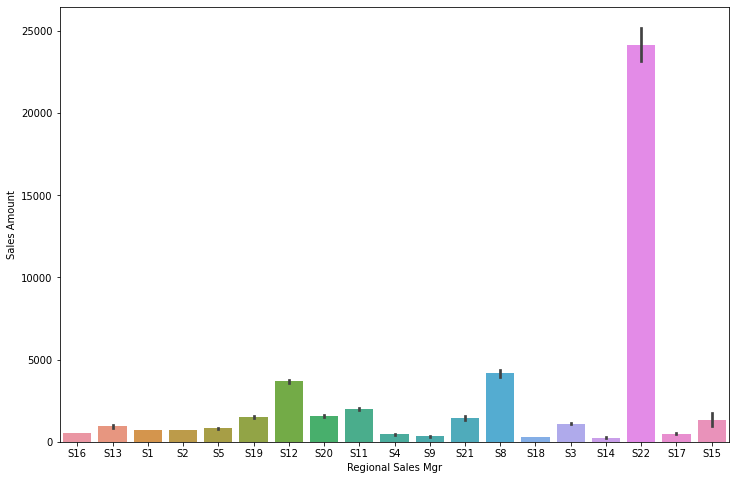

In [ ]:
ax=plt.figure(figsize=(12,8))
sb.barplot(x='Regional Sales Mgr',y='Sales Amount',data=combined)

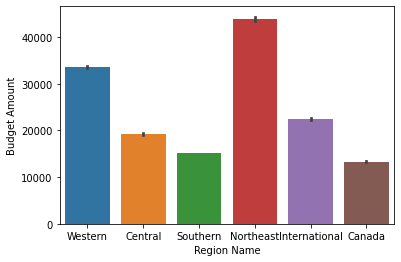

In [ ]:
sb.barplot(x='Region Name', y='Budget Amount', data=combined)

In [ ]:
combined['Customer Type'].value_counts()

G2    3970172
G1     586664
G3     356022
Name: Customer Type, dtype: int64

In [ ]:
combined.isnull().sum()

Actual Delivery Date                  19392
CustKey                                   0
Backlog Amount                      4912858
BackOrder Amount                    4912858
Discount Amount                      127126
Doc Type                                  0
Invoice Date                              0
Invoice Number                            0
Item-Branch Key                           0
Line Desc 1                               0
Line Number                               0
Line Type                                 0
List Price                                0
Order Number                              0
Payment Terms                             0
Promised Delivery Date                    0
Sales Amount                              0
Sales Amount Based on List Price          0
Sales Cost Amount                         0
Sales Margin Amount                       0
Sales Price                             774
Sales Quantity                            0
Sales Rep                       

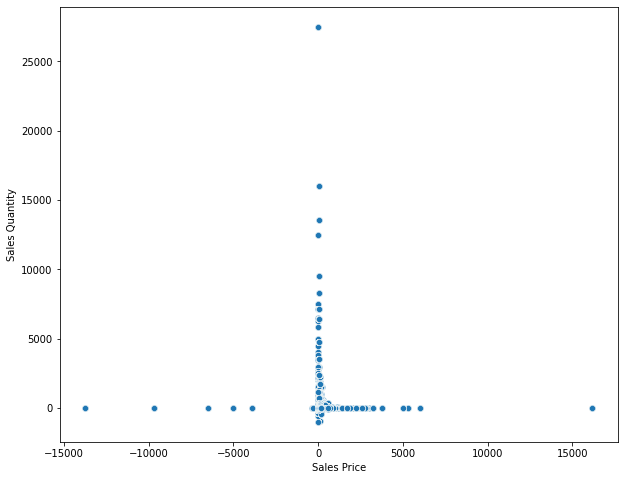

In [ ]:
ax=plt.figure(figsize=(10,8))
sb.scatterplot(data=combined, x='Sales Amount', y='')

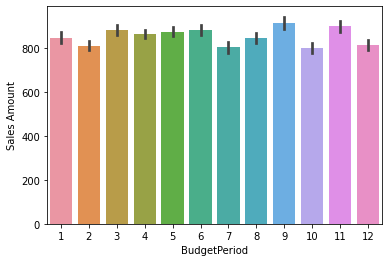

In [ ]:
sb.barplot(x='BudgetPeriod', y='Sales Amount', data=combined)

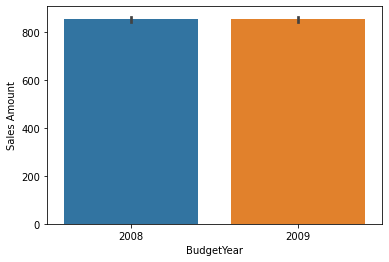

In [ ]:
sb.barplot(x='BudgetYear', y='Sales Amount', data=combined)

[Text(0, 0, 'Craig Amundson'),
 Text(0, 0, 'Kathy Clinton'),
 Text(0, 0, 'TAGnology'),
 Text(0, 0, 'Viginia Mountain'),
 Text(0, 0, 'Angelen Carter'),
 Text(0, 0, 'Karl Anderson'),
 Text(0, 0, 'Ronald Golinski'),
 Text(0, 0, 'Amalia Craig'),
 Text(0, 0, 'John Greg'),
 Text(0, 0, 'Odessa Morris'),
 Text(0, 0, 'John Davis'),
 Text(0, 0, 'Amanda Honda'),
 Text(0, 0, 'Ruth Sakas'),
 Text(0, 0, 'Karen Clinton'),
 Text(0, 0, 'Robert Kim'),
 Text(0, 0, 'Sandra Howard'),
 Text(0, 0, 'Ted Moy'),
 Text(0, 0, 'Stewart Wind'),
 Text(0, 0, 'Ronald Milam'),
 Text(0, 0, 'Sheila Hein'),
 Text(0, 0, 'Donna Brown'),
 Text(0, 0, 'Micheal Williams'),
 Text(0, 0, 'David Howard'),
 Text(0, 0, 'Brenda Kegler'),
 Text(0, 0, 'Judy Thurman'),
 Text(0, 0, 'Jose Bowen'),
 Text(0, 0, 'Judy Rowlett'),
 Text(0, 0, 'Sharon Carver'),
 Text(0, 0, 'Kim Williams'),
 Text(0, 0, 'Dennis Johnson'),
 Text(0, 0, 'Amelia Fields'),
 Text(0, 0, 'Cary Frank'),
 Text(0, 0, 'Janice Scott'),
 Text(0, 0, 'Scott Powell'),
 Text(0, 0, 

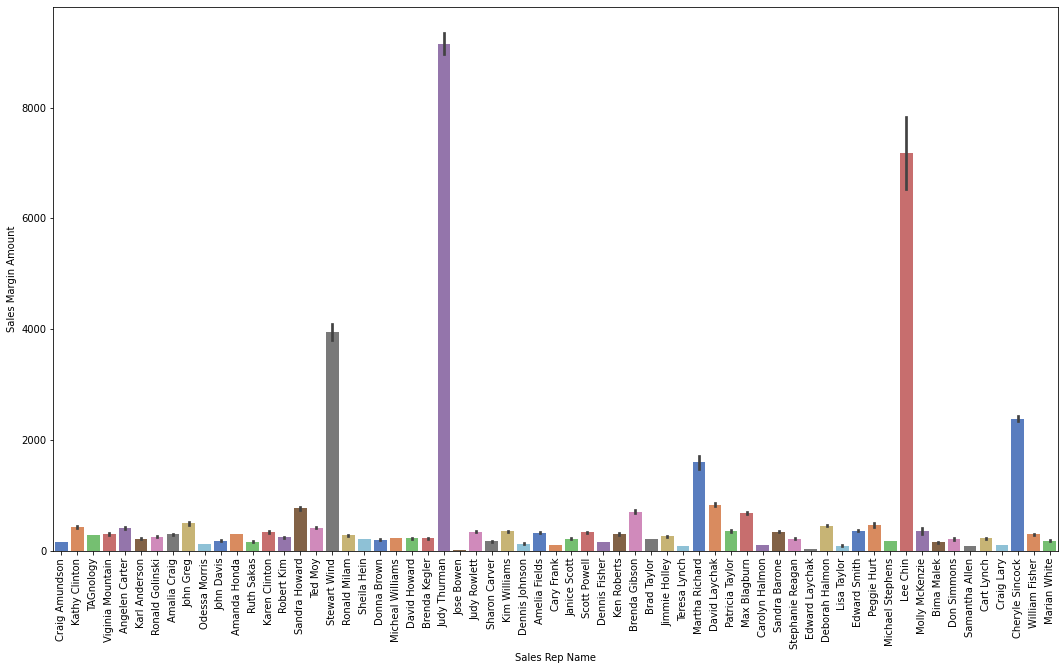

In [ ]:
ax=plt.figure(figsize=(18,10))
ax = sb.barplot(y='Sales Margin Amount', x='Sales Rep Name', 
                 data=combined, 
                 palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

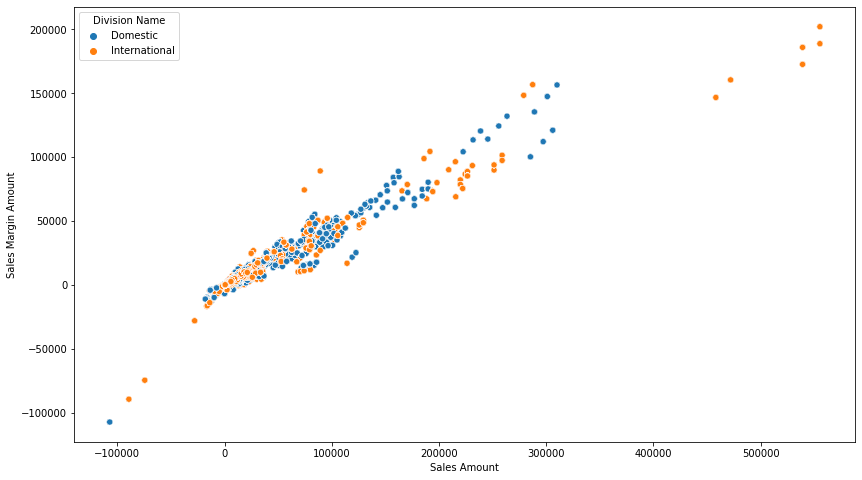

In [ ]:
ax=plt.figure(figsize=(14,8))
sb.scatterplot(data=combined, x='Sales Amount', y='Sales Margin Amount', hue='Division Name')

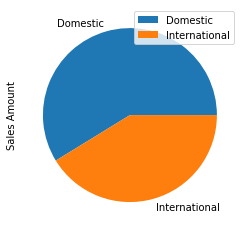

In [ ]:
combined.groupby(['Division Name']).sum().plot(kind='pie', y='Sales Amount')